<h1>Exploring Sheffield Neighbourhoods</h1>


<a id="item1"></a><h3>Description of the Project</h3>

This project will try to solve a problem or question by applying data science methods on the location data gotten from FourSquare API, using Web-Scraping, Folium Map and commonly available data on web.


**The question to solve:** 


>This project will try to explore the neighborhoods of Sheffield to figure out which is the best one to move in as family. 

Important decision driving factors are:
- closeness of parks and schools
- average prices
- safety
- children friendly

After choosing a neighbourhood we should look for properties around mean price. Depending on the market particularities of each neighborhood, a $200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where are budget goes as average.

Sale prices are lower in a bad neighborhood, and we can get a high-quality house there, but we want avoid bad neighborhood (for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.)

High-quality neighborhoods will tend to be avoided as well because of the higher prices — we may only be able to get a poor-quality house in a good location. In this case we will aim for something in the middle. 

We will analyze the city in the geographical way - postcode districts and postcode sectors according to the data available. Later we will cluster neighbourhoods to get them in the similar groups.In this analysis we will analyze data for neighborhoods:

Our goal is to find out for which of these neighborhoods the crime rate is low, has high number of schoolchildren, has schools and parks and property prices are affordable. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="#item1">Description of the Project</a>
        </li>
        <li>
            <a href="#item2">Data acquisition and cleaning</a>  
            <ul>
                <li><a href="#item3">Description of the data</a></li>
                <li><a href="#item4">Data for postcode districts</a></li>
                <li><a href="#item5">Data for postcode sectors</a></li>
            </ul>
        </li>
        <li>
            <a href="#item6">Data Analysis</a> 
            <ul>
                <li><a href="#item7">Crime rate</a></li>
                <li><a href="#item8">Age distribution analysis</a></li>
                <li><a href="#item9">Visualizing density</a></li>
                <li><a href="#item10">Housing prices</a></li>
                <li><a href="#item11">Parks and playgrounds</a></li>
                <li><a href="#item12">Schools</a></li> 
            </ul>
        </li>
        <li>
            <a href="#item13">Results / Summary</a>
        </li>
        <li>
            <a href="#item14">Clustering neighbourhoods</a>
            <ul>
                <li><a href="#item15">Analyze venues for each postalcode</a></li>
                <li><a href="#item16">Examine the Clusters</a></li> 
            </ul>
        </li>
        </li>
    </ul>
  

<a id="item2"></a><h3>Data acquisition and cleaning</h3> 

<a id="item3"></a><h4>Description of the data</h4> 

The main data sources used for this project:

- List of Postcodes areas: https://en.wikipedia.org/wiki/S_postcode_area
- List of Postcodes districts: https://en.wikipedia.org/wiki/List_of_postcode_districts_in_the_United_Kingdom
- Crime Data: https://data.police.uk/data/ (for Jan - Dec 2019). 
- Census Data: https://www.nomisweb.co.uk/census/2011 for demographic data. 
- Sheffield Average House Prices for neighbourhoods : https://www.sheffield.gov.uk/home/housing/sheffield-housing-market
- Rental Prices: https://propertydata.co.uk/, data by postcode areas and postcode districts, all data is updated in close to real-time (05-8-2020)

Other supporting sites:

- For postcodes geocoding: https://www.doogal.co.uk/BatchGeocoding.php
- helpful with the project:
https://stackoverflow.com/questions/36202514/foilum-map-module-trying-to-get-more-options-for-marker-colors
https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7   
https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library
from bs4 import BeautifulSoup
import re

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Spatial Visualizations
import folium
import folium.plugins

><a id="item4"></a><h3>Data for postcode districts</h3>

**Getting list of postcodes and corresponding neighbourhoods**

**Scrape the HTML**

In [2]:
# List S postcode area, also known as the Sheffield postcode area
url = 'https://en.wikipedia.org/wiki/S_postcode_area'

In [3]:
results = requests.get(url).text
content = BeautifulSoup(results, 'html.parser')

In [4]:
content

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>S postcode area - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9cb7894e-3f16-4475-b869-7f13af5422e8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"S_postcode_area","wgTitle":"S postcode area","wgCurRevisionId":948491464,"wgRevisionId":948491464,"wgArticleId":7331994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","EngvarB from July 2016","Use dmy dates from July 2016","Articles using KML from Wikidata","

In [5]:
print(content.prettify())    #Prettify() function enable to view how the tags are nested in the document

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   S postcode area - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9cb7894e-3f16-4475-b869-7f13af5422e8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"S_postcode_area","wgTitle":"S postcode area","wgCurRevisionId":948491464,"wgRevisionId":948491464,"wgArticleId":7331994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","EngvarB from July 2016","Use dmy dates from July 2016","Articles using KML

In [6]:
my_table = content.find('table',{'class':'wikitable sortable'})    # all the table contents which we intend to extract is under class Wikitable Sortable

helped with webscraping:

https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722

https://stackoverflow.com/questions/50355577/scraping-wikipedia-tables-with-python-selectively

In [7]:
postcode_district = []
areas = []
local_authority = []
for item in my_table.find_all('tr')[1::1]:    #[1::1] to exclude header
    data = item.find_all(['th','td'])
    postcode_district.append(data[0].text.rstrip('\n'))
    areas.append(data[2].text.rstrip('\n'))
    local_authority.append(data[3].text.rstrip('\n'))

In [8]:
sheffield_districts = [('Post Code', postcode_district),
                      ('Areas', areas),
                      ('Local Authority', local_authority)]
df = pd.DataFrame.from_dict(dict(sheffield_districts))
df

,Post Code,Areas,Local Authority
0,S1,Sheffield City Centre,Sheffield
1,S2,"Arbourthorne, Heeley, Highfield, Manor, Norfol...",Sheffield
2,S3,"Broomhall, Burngreave, Neepsend, Netherthorpe",Sheffield
3,S4,"Grimesthorpe, Pitsmoor",Sheffield
4,S5,"Firth Park, Fir Vale, Longley, Shirecliffe, Sh...",Sheffield
5,S6,"Bradfield, Dungworth, Hillsborough, Holdworth,...",Sheffield
6,S7,"Abbeydale, Carter Knowle, Nether Edge, Millhouses",Sheffield
7,S8,"Batemoor, Beauchief, Greenhill, Jordanthorpe, ...",Sheffield
8,S9,"Attercliffe, Brightside, Darnall, Meadowhall, ...",Sheffield
9,S10,"Broomhill, Broomhall, Crookes, Crookesmoor, Cr...",Sheffield


In analysis we include postcodes S1-S20, excluding S18 which is entirely part of Dronfield. S35 and S36 seems to be part of Sheffield like S12 (being part of North East Derbyshire) and S13 (being part of Rotherham), however most of the area lies outside Sheffield.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/S_postcode_area_map.svg/600px-S_postcode_area_map.svg.png" width=500 align="center">

In [9]:
df_subset = df[0:17].drop(15)
df_subset.set_index('Post Code', inplace=True)

In [10]:
df_subset

,Areas,Local Authority
Post Code,,
S1,Sheffield City Centre,Sheffield
S2,"Arbourthorne, Heeley, Highfield, Manor, Norfol...",Sheffield
S3,"Broomhall, Burngreave, Neepsend, Netherthorpe",Sheffield
S4,"Grimesthorpe, Pitsmoor",Sheffield
S5,"Firth Park, Fir Vale, Longley, Shirecliffe, Sh...",Sheffield
S6,"Bradfield, Dungworth, Hillsborough, Holdworth,...",Sheffield
S7,"Abbeydale, Carter Knowle, Nether Edge, Millhouses",Sheffield
S8,"Batemoor, Beauchief, Greenhill, Jordanthorpe, ...",Sheffield
S9,"Attercliffe, Brightside, Darnall, Meadowhall, ...",Sheffield


**Getting location data to postcodes**

> https://www.doogal.co.uk/BatchGeocoding.php

In [11]:
coordinates = pd.read_csv('C:/Users/Asus/Capstone IBM/locations.csv')
coordinates.head(3)

,Address,Latitude,Longitude,Easting,Northing,Constituency,District,Ward,LSOA,Region,Country,National park
0,S1,53.3806,-1.46947,435388,387214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S2,53.3714,-1.45079,436639,386200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S3,53.3868,-1.47303,435147,387902,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
coordinates = coordinates.iloc[:,0:3]

In [13]:
coordinates

,Address,Latitude,Longitude
0,S1,53.3806,-1.46947
1,S2,53.3714,-1.45079
2,S3,53.3868,-1.47303
3,S4,53.3977,-1.45150
4,S5,53.4223,-1.46223
5,S6,53.4024,-1.50941
6,S7,53.3547,-1.48991
7,S8,53.3428,-1.47935
8,S9,53.3968,-1.42101
9,S10,53.3771,-1.51689


**Load population data**

In [14]:
ethnicity = pd.read_csv('C:/Users/Asus/Capstone IBM/ethnicity.csv')
ethnicity.head(3)

,date,geography,geography code,Rural Urban,Ethnic Group: All usual residents; measures: Value,Ethnic Group: White; measures: Value,Ethnic Group: White: English/Welsh/Scottish/Northern Irish/British; measures: Value,Ethnic Group: White: Irish; measures: Value,Ethnic Group: White: Gypsy or Irish Traveller; measures: Value,Ethnic Group: White: Other White; measures: Value,...,Ethnic Group: Asian/Asian British: Bangladeshi; measures: Value,Ethnic Group: Asian/Asian British: Chinese; measures: Value,Ethnic Group: Asian/Asian British: Other Asian; measures: Value,Ethnic Group: Black/African/Caribbean/Black British; measures: Value,Ethnic Group: Black/African/Caribbean/Black British: African; measures: Value,Ethnic Group: Black/African/Caribbean/Black British: Caribbean; measures: Value,Ethnic Group: Black/African/Caribbean/Black British: Other Black; measures: Value,Ethnic Group: Other ethnic group; measures: Value,Ethnic Group: Other ethnic group: Arab; measures: Value,Ethnic Group: Other ethnic group: Any other ethnic group; measures: Value
0,2011,AL1,AL1,Total,36180,30029,26551,778,55,2645,...,1406,397,701,895,413,370,112,329,164,165
1,2011,AL10,AL10,Total,35900,25883,22310,555,61,2957,...,288,1347,1013,3165,2567,430,168,605,370,235
2,2011,AL2,AL2,Total,23604,20359,18728,490,26,1115,...,413,212,519,439,236,170,33,230,91,139


Keeping only total values for each ethnicity, renaming columns

In [15]:
ethnicity = ethnicity[['geography', 'geography code', 'Ethnic Group: All usual residents; measures: Value','Ethnic Group: White; measures: Value', 'Ethnic Group: Mixed/multiple ethnic groups; measures: Value', 'Ethnic Group: Asian/Asian British; measures: Value', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value', 'Ethnic Group: Other ethnic group; measures: Value']] 
ethnicity.rename(columns={'geography code':'Postcode', 'Ethnic Group: All usual residents; measures: Value':'Total', 'Ethnic Group: White; measures: Value':'White','Ethnic Group: Mixed/multiple ethnic groups; measures: Value' : 'Mixed ethnic', 'Ethnic Group: Asian/Asian British; measures: Value': 'Asian', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value': 'Black', 'Ethnic Group: Other ethnic group; measures: Value': 'Other'}, inplace=True)

Checking whether geography and gepgraphy code columns are the same

In [16]:
check = 'geography' == 'geography code'
check

False

In [17]:
population_districts = pd.read_csv('C:/Users/Asus/Capstone IBM/population district.csv')
population_districts = population_districts.iloc[:,[1,4,9,11]]
population_districts.rename(columns={'Variable: All usual residents; measures: Value':'All residents Total', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value':'Schoolchild or full-time student aged 4 and over' ,'Ethnic Group: Mixed/multiple ethnic groups; measures: Value' : 'Mixed ethnic', 'Ethnic Group: Asian/Asian British; measures: Value': 'Asian', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value': 'Black', 'Variable: Density (number of persons per hectare); measures: Value': 'Density'}, inplace=True)
population_districts.head(3)

,geography,All residents Total,Schoolchild or full-time student aged 4 and over,Density
0,AL1,36180,616,34.3
1,AL10,35900,367,17.7
2,AL2,23604,351,6.3


In [18]:
age_districts = pd.read_csv('C:/Users/Asus/Capstone IBM/age districts.csv')
age_districts.head(3)

,date,geography,geography code,Rural Urban,Age: All usual residents; measures: Value,Age: Age 0 to 4; measures: Value,Age: Age 5 to 7; measures: Value,Age: Age 8 to 9; measures: Value,Age: Age 10 to 14; measures: Value,Age: Age 15; measures: Value,...,Age: Age 25 to 29; measures: Value,Age: Age 30 to 44; measures: Value,Age: Age 45 to 59; measures: Value,Age: Age 60 to 64; measures: Value,Age: Age 65 to 74; measures: Value,Age: Age 75 to 84; measures: Value,Age: Age 85 to 89; measures: Value,Age: Age 90 and over; measures: Value,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
0,2011,AL1,AL1,Total,36180,2852,1399,787,1925,394,...,3145,9576,6456,1720,2402,1610,459,259,37.2,36.0
1,2011,AL10,AL10,Total,35900,2141,1017,590,1458,307,...,3583,6442,4692,1183,1627,1364,396,252,33.0,27.0
2,2011,AL2,AL2,Total,23604,1506,863,507,1489,310,...,1231,4941,4928,1448,2163,1380,328,153,40.0,41.0


**Crime rate**

In [19]:
crime_districts = pd.read_csv('C:/Users/Asus/Capstone IBM/demographics and crime by districts.csv')
crime_districts.head(3)

,Postcode,Crime rate,Population,Avg. household income,URL
0,AL1,110,"36,203","61,500",https://propertydata.co.uk/draw?input=AL1
1,AL2,80,"23,314","51,800",https://propertydata.co.uk/draw?input=AL2
2,AL3,99,"27,971","59,000",https://propertydata.co.uk/draw?input=AL3


In [20]:
crime_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postcode               2164 non-null   object
 1   Crime rate             2164 non-null   object
 2   Population             2164 non-null   object
 3   Avg. household income  2164 non-null   object
 4   URL                    2164 non-null   object
dtypes: object(5)
memory usage: 84.7+ KB


Crime rate, Population and income have incorrect data type. Let's convert it to integers.

In [21]:
for col in ['Crime rate', 'Population', 'Avg. household income']:
    crime_districts[col] = crime_districts[col].str.replace(',','').astype(int)

Merge population data together

In [22]:
# merge coordinates with ethnicity data
merged_1 = pd.merge(coordinates, ethnicity, how='left', left_on='Address', right_on='geography').drop(columns=['geography', 'Postcode'])

# merge crime data
merged_2 = pd.merge(merged_1, crime_districts, how='left', left_on='Address', right_on='Postcode').drop(columns=['Postcode', 'URL'])

# merge population data
merged_3 = pd.merge(merged_2, population_districts, how='left', left_on='Address', right_on='geography').drop('geography', axis=1)

# adding mean and median age and creting final dataset
demography_D = pd.merge(merged_3, age_districts[['geography','Age: Mean Age; measures: Value','Age: Median Age; measures: Value']], how='left', left_on='Address', right_on='geography').drop('geography', axis=1)
demography_D.set_index('Address', inplace=True)
demography_D.head(3)

,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
Address,,,,,,,,,,,,,,,,
S1,53.3806,-1.46947,10651,7151,233,2208,505,554,772,9829,39100,10651,130,74.7,23.7,21.0
S2,53.3714,-1.45079,44529,34539,1726,4177,2890,1197,153,44834,33500,44529,247,40.4,34.3,30.0
S3,53.3868,-1.47303,19330,8594,792,4895,2934,2115,193,19139,36800,19330,133,58.4,28.2,24.0


In [23]:
demography_D

,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
Address,,,,,,,,,,,,,,,,
S1,53.3806,-1.46947,10651,7151,233,2208,505,554,772,9829,39100,10651,130,74.7,23.7,21.0
S2,53.3714,-1.45079,44529,34539,1726,4177,2890,1197,153,44834,33500,44529,247,40.4,34.3,30.0
S3,53.3868,-1.47303,19330,8594,792,4895,2934,2115,193,19139,36800,19330,133,58.4,28.2,24.0
S4,53.3977,-1.45150,14465,5315,695,4574,2099,1782,179,13867,34800,14465,76,42.0,31.5,29.0
S5,53.4223,-1.46223,59868,48645,1850,4845,2811,1717,143,60467,32600,59868,270,43.3,36.7,35.0
S6,53.4024,-1.50941,58252,53680,1161,1240,1133,1038,97,58237,41200,58252,437,5.4,39.9,39.0
S7,53.3547,-1.48991,17436,12221,483,3885,567,280,89,17453,50200,17436,323,44.7,36.2,34.0
S8,53.3428,-1.47935,46174,41360,1072,2221,1131,390,101,45911,40800,46174,442,32.6,40.2,40.0
S9,53.3968,-1.42101,28089,16485,856,8067,1608,1073,181,27903,34500,28089,126,15.0,34.9,33.0


**Property and rental prices**

*Average asking price* for District postcodes has a one null value for a S14. *Average £/sqft* is only column without null values.

In [24]:
property_prices_districts = pd.read_csv('C:/Users/Asus/Capstone IBM/property prices districts.csv')
property_prices_districts.head(3)

,Postcode,Avg asking price,Avg asking price (studio),Avg asking price (1 bed),Avg asking price (2 bed),Avg asking price (3 bed),Avg asking price (4 bed),Avg asking price (5 bed),Average £/sqft,URL
0,AL1,"483,520",NaN,"303,936","438,734","620,879","893,956",NaN,562,https://propertydata.co.uk/draw?input=AL1
1,AL2,"509,674",NaN,"242,400","343,254","510,953","705,960",NaN,453,https://propertydata.co.uk/draw?input=AL2
2,AL3,"563,343",NaN,"261,250","422,679","562,902","810,309",NaN,517,https://propertydata.co.uk/draw?input=AL3


In [25]:
#subset data to our postcodes
postcodes = df_subset.index.tolist()
property_prices_D = property_prices_districts[property_prices_districts['Postcode'].isin(postcodes)]
property_prices_D = property_prices_D.set_index('Postcode')
property_prices_D

,Avg asking price,Avg asking price (studio),Avg asking price (1 bed),Avg asking price (2 bed),Avg asking price (3 bed),Avg asking price (4 bed),Avg asking price (5 bed),Average £/sqft,URL
Postcode,,,,,,,,,
S1,"113,400","75,054","112,601","157,109",NaN,NaN,NaN,240,https://propertydata.co.uk/draw?input=S1
S2,"116,296",NaN,NaN,"105,541","141,844",NaN,NaN,159,https://propertydata.co.uk/draw?input=S2
S3,"109,284","75,658","106,903","148,095",NaN,NaN,NaN,211,https://propertydata.co.uk/draw?input=S3
S4,"102,500",NaN,NaN,NaN,NaN,NaN,NaN,91,https://propertydata.co.uk/draw?input=S4
S5,"123,922",NaN,NaN,"97,140","131,914",NaN,NaN,124,https://propertydata.co.uk/draw?input=S5
S6,"173,480",NaN,"105,993","138,868","183,850","306,029",NaN,185,https://propertydata.co.uk/draw?input=S6
S7,"305,125",NaN,NaN,NaN,"269,000","388,731",NaN,230,https://propertydata.co.uk/draw?input=S7
S8,"207,183",NaN,NaN,"158,541","200,231","337,000",NaN,204,https://propertydata.co.uk/draw?input=S8
S9,"115,601",NaN,NaN,NaN,"119,757",NaN,NaN,125,https://propertydata.co.uk/draw?input=S9


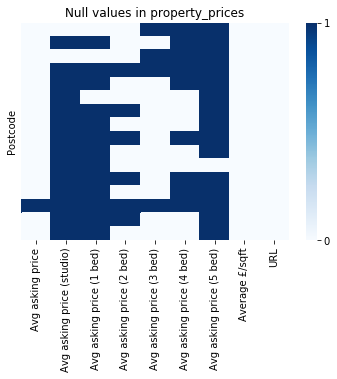

In [26]:
plt.title('Null values in property_prices', fontsize=12)
sns.heatmap(property_prices_D.isnull(), cmap="Blues", yticklabels=False, cbar_kws={'ticks': [0, 1]})

In [27]:
#pattern = "^S\d"
#property_prices[property_prices['Postcode'].str.contains(pattern)]

In [28]:
rental_prices_districts = pd.read_csv('C:/Users/Asus/Capstone IBM/rental by districts.csv')
rental_prices_districts.head(3)

,Postcode,Avg asking rent (pm),"Avg asking rent (studio, pm)","Avg asking rent (1 bed, pm)","Avg asking rent (2 bed, pm)","Avg asking rent (3 bed, pm)","Avg asking rent (4 bed, pm)","Avg asking rent (5 bed, pm)",URL
0,AL1,"1,199",NaN,987,"1,326",NaN,NaN,NaN,https://propertydata.co.uk/draw?input=AL1
1,AL2,"1,323",NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=AL2
2,AL3,"1,375",NaN,NaN,"1,409",NaN,NaN,NaN,https://propertydata.co.uk/draw?input=AL3


It seems Rental data has many null values, let's examine it.

In [29]:
missing_data = rental_prices_districts.isnull().sum()
missing_data

Postcode                           0
Avg asking rent (pm)             819
Avg asking rent (studio, pm)    2060
Avg asking rent (1 bed, pm)     1692
Avg asking rent (2 bed, pm)     1514
Avg asking rent (3 bed, pm)     1848
Avg asking rent (4 bed, pm)     2012
Avg asking rent (5 bed, pm)     2104
URL                                0
dtype: int64

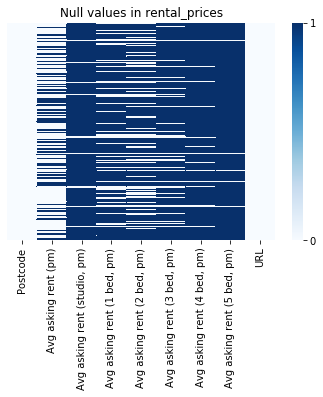

In [30]:
plt.title('Null values in rental_prices', fontsize=12)
sns.heatmap(rental_prices_districts.isnull(), cmap="Blues", yticklabels=False, cbar_kws={'ticks': [0, 1]})

Let's check null values for our postcodes.

In [31]:
rental_prices_districts[rental_prices_districts['Postcode'].isin(postcodes)]

,Postcode,Avg asking rent (pm),"Avg asking rent (studio, pm)","Avg asking rent (1 bed, pm)","Avg asking rent (2 bed, pm)","Avg asking rent (3 bed, pm)","Avg asking rent (4 bed, pm)","Avg asking rent (5 bed, pm)",URL
1537,S1,669,NaN,601,825,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S1
1538,S2,611,NaN,413,644,641,932,NaN,https://propertydata.co.uk/draw?input=S2
1539,S3,629,NaN,593,746,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S3
1540,S4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S4
1541,S5,540,NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S5
1542,S6,638,NaN,486,637,696,NaN,NaN,https://propertydata.co.uk/draw?input=S6
1543,S7,743,NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S7
1544,S8,644,NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S8
1545,S9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S9
1546,S10,859,NaN,492,721,915,"1,323","1,729",https://propertydata.co.uk/draw?input=S10


I decided to drop this dataset from analysis due too a lot of missing values.

><a id="item5"></a><h3>Data for postcode sectors</h3>

In [32]:
coordinates_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/locations_sectors.csv')
coordinates_sectors = coordinates_sectors.iloc[:,0:3]
coordinates_sectors.head(3)

,Address,Latitude,Longitude
0,S1 2,53.3815,-1.46786
1,S1 4,53.3786,-1.47333
2,S2 1,53.3699,-1.42670


In [33]:
sectors_list = coordinates_sectors['Address'].tolist()

In [34]:
crime_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/demographics and crime sectors.csv')
crime_sectors = crime_sectors[crime_sectors['Postcode'].isin(sectors_list)]
crime_sectors.head(3)

,Postcode,Crime rate,Population,Avg. household income,URL
5528,S1 2,96,"43,055","41,400",https://propertydata.co.uk/draw?input=S1 2
5529,S1 4,84,"32,518","42,900",https://propertydata.co.uk/draw?input=S1 4
5530,S2 1,"2,771","6,478","55,500",https://propertydata.co.uk/draw?input=S2 1


In [35]:
crime_sectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 5528 to 5586
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postcode               55 non-null     object
 1   Crime rate             53 non-null     object
 2   Population             53 non-null     object
 3   Avg. household income  53 non-null     object
 4   URL                    55 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [36]:
#creating column with district postcode out of sector postcode
#crime_sectors['Postcode district'] = crime_sectors['Postcode'].str[:-2]

In [37]:
crime_sectors

,Postcode,Crime rate,Population,Avg. household income,URL
5528,S1 2,96,"43,055","41,400",https://propertydata.co.uk/draw?input=S1 2
5529,S1 4,84,"32,518","42,900",https://propertydata.co.uk/draw?input=S1 4
5530,S2 1,"2,771","6,478","55,500",https://propertydata.co.uk/draw?input=S2 1
5531,S2 2,179,"8,075","47,600",https://propertydata.co.uk/draw?input=S2 2
5532,S2 3,"2,165",546,"50,900",https://propertydata.co.uk/draw?input=S2 3
5533,S2 4,496,597,"50,200",https://propertydata.co.uk/draw?input=S2 4
5534,S2 5,360,"2,256","46,800",https://propertydata.co.uk/draw?input=S2 5
5535,S3 7,258,"47,574","56,900",https://propertydata.co.uk/draw?input=S3 7
5536,S3 8,741,"4,012","55,400",https://propertydata.co.uk/draw?input=S3 8
5537,S3 9,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S3 9


We can see that S14 consists just out of one sector and has a null value for a crime rate. We replace this value with value form S14 for whole district S14.

In [38]:
for col in ['Crime rate', 'Population', 'Avg. household income']:
    crime_sectors[col] = crime_sectors[col].fillna('0')
    crime_sectors[col] = crime_sectors[col].str.replace(',','').astype(int)
    crime_sectors[col] = crime_sectors[col].replace(0, np.nan)

In [39]:
value = demography_D.iloc[13,8]
mask = crime_sectors['Postcode'] == 'S14 1'
crime_sectors.at[mask, "Crime rate"] = int(value)

In [40]:
crime_sectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 5528 to 5586
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Postcode               55 non-null     object 
 1   Crime rate             54 non-null     float64
 2   Population             53 non-null     float64
 3   Avg. household income  53 non-null     float64
 4   URL                    55 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.6+ KB


In [41]:
crime_sectors

,Postcode,Crime rate,Population,Avg. household income,URL
5528,S1 2,96.0,43055.0,41400.0,https://propertydata.co.uk/draw?input=S1 2
5529,S1 4,84.0,32518.0,42900.0,https://propertydata.co.uk/draw?input=S1 4
5530,S2 1,2771.0,6478.0,55500.0,https://propertydata.co.uk/draw?input=S2 1
5531,S2 2,179.0,8075.0,47600.0,https://propertydata.co.uk/draw?input=S2 2
5532,S2 3,2165.0,546.0,50900.0,https://propertydata.co.uk/draw?input=S2 3
5533,S2 4,496.0,597.0,50200.0,https://propertydata.co.uk/draw?input=S2 4
5534,S2 5,360.0,2256.0,46800.0,https://propertydata.co.uk/draw?input=S2 5
5535,S3 7,258.0,47574.0,56900.0,https://propertydata.co.uk/draw?input=S3 7
5536,S3 8,741.0,4012.0,55400.0,https://propertydata.co.uk/draw?input=S3 8
5537,S3 9,NaN,NaN,NaN,https://propertydata.co.uk/draw?input=S3 9


In [42]:
population_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/population by sector.csv')
population_sectors = population_sectors.iloc[:,[1,4,9,11]]

In [43]:
population_sectors.rename(columns={'Variable: All usual residents; measures: Value':'All residents Total', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value':'Schoolchild or full-time student aged 4 and over' ,'Ethnic Group: Mixed/multiple ethnic groups; measures: Value' : 'Mixed ethnic', 'Ethnic Group: Asian/Asian British; measures: Value': 'Asian', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value': 'Black', 'Variable: Density (number of persons per hectare); measures: Value': 'Density'}, inplace=True)
population_sectors.head(3)

,geography,All residents Total,Schoolchild or full-time student aged 4 and over,Density
0,AL1 1,5453,75,24.2
1,AL1 2,6523,77,22.8
2,AL1 3,4179,46,43.0


In [44]:
age_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/age structure sector.csv')
age_sectors.head(3)

,date,geography,geography code,Rural Urban,Age: All usual residents; measures: Value,Age: Age 0 to 4; measures: Value,Age: Age 5 to 7; measures: Value,Age: Age 8 to 9; measures: Value,Age: Age 10 to 14; measures: Value,Age: Age 15; measures: Value,...,Age: Age 25 to 29; measures: Value,Age: Age 30 to 44; measures: Value,Age: Age 45 to 59; measures: Value,Age: Age 60 to 64; measures: Value,Age: Age 65 to 74; measures: Value,Age: Age 75 to 84; measures: Value,Age: Age 85 to 89; measures: Value,Age: Age 90 and over; measures: Value,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
0,2011,AL1 1,AL1 1,Total,5453,432,166,87,199,45,...,479,1660,1001,279,368,245,67,42,38.6,37.0
1,2011,AL1 2,AL1 2,Total,6523,521,275,155,387,86,...,410,1593,1108,332,507,344,111,81,38.2,37.0
2,2011,AL1 3,AL1 3,Total,4179,317,118,51,123,20,...,697,1290,589,150,229,160,64,39,36.4,33.0


In [45]:
ethnicity_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/ethnicity sectors.csv')
ethnicity_sectors = ethnicity_sectors[['geography', 'Ethnic Group: All usual residents; measures: Value','Ethnic Group: White; measures: Value', 'Ethnic Group: Mixed/multiple ethnic groups; measures: Value', 'Ethnic Group: Asian/Asian British; measures: Value', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value', 'Ethnic Group: Other ethnic group; measures: Value']] 

In [46]:
ethnicity_sectors.rename(columns={'Ethnic Group: All usual residents; measures: Value':'Total', 'Ethnic Group: White; measures: Value':'White','Ethnic Group: Mixed/multiple ethnic groups; measures: Value' : 'Mixed ethnic', 'Ethnic Group: Asian/Asian British; measures: Value': 'Asian', 'Ethnic Group: Black/African/Caribbean/Black British; measures: Value': 'Black', 'Ethnic Group: Other ethnic group; measures: Value': 'Other'}, inplace=True)


Housing data can be unreliable as having a lot of null values Avg asking price may be not representative.

In [47]:
property_prices_sectors = pd.read_csv('C:/Users/Asus/Capstone IBM/property prices sectors.csv')
property_prices_sectors = property_prices_sectors[property_prices_sectors['Postcode'].isin(sectors_list)]
property_prices_sectors.head(3)

,Postcode,Avg asking price,Avg asking price (studio),Avg asking price (1 bed),Avg asking price (2 bed),Avg asking price (3 bed),Avg asking price (4 bed),Avg asking price (5 bed),Average £/sqft,Sales per month,Turnover (sale),URL
5528,S1 2,"226,852",NaN,NaN,"140,180","195,398","348,847","492,070",194,18.0,6.0,https://propertydata.co.uk/draw?input=S1 2
5529,S1 4,"211,924",NaN,NaN,"139,076","209,142","302,634",NaN,200,18.0,8.0,https://propertydata.co.uk/draw?input=S1 4
5530,S2 1,"1,488,862",NaN,"936,627","1,605,457","2,929,604",NaN,NaN,"1,676",2.0,NaN,https://propertydata.co.uk/draw?input=S2 1


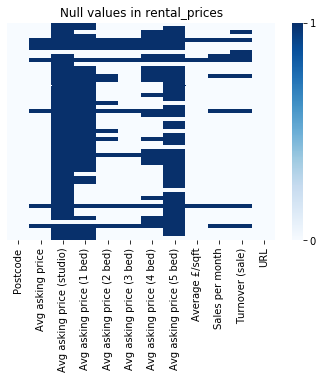

In [48]:
plt.title('Null values in rental_prices', fontsize=12)
sns.heatmap(property_prices_sectors.isnull(), cmap="Blues", yticklabels=False, cbar_kws={'ticks': [0, 1]})

Merge dataset

While merging turned out there's double and even triple spacing in a postcode in a geography columns, let's clean that. 

In [49]:
ethnicity_sectors.geography = ethnicity_sectors.geography.str.replace('   ', ' ')
ethnicity_sectors.geography = ethnicity_sectors.geography.str.replace('  ', ' ')
population_sectors.geography = population_sectors.geography.str.replace('   ', ' ')
population_sectors.geography = population_sectors.geography.str.replace('  ', ' ')
age_sectors.geography = population_sectors.geography.str.replace('   ', ' ')
age_sectors.geography = population_sectors.geography.str.replace('  ', ' ')

In [50]:
# merge coordinates with ethnicity data
sectors_1 = pd.merge(coordinates_sectors, ethnicity_sectors, how='left', left_on='Address', right_on='geography').drop('geography', axis=1)

# merge crime data
sectors_2 = pd.merge(sectors_1, crime_sectors, how='left', left_on='Address', right_on='Postcode').drop(columns=['Postcode', 'URL'])

# merge population data
sectors_3 = pd.merge(sectors_2, population_sectors, how='left', left_on='Address', right_on='geography').drop('geography', axis=1)

# adding mean and median age and creting final dataset
demography_S = pd.merge(sectors_3, age_sectors[['geography','Age: Mean Age; measures: Value','Age: Median Age; measures: Value']], how='left', left_on='Address', right_on='geography').drop('geography', axis=1)
demography_S.set_index('Address', inplace=True)
demography_S.head(3)

,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
Address,,,,,,,,,,,,,,,,
S1 2,53.3815,-1.46786,1330,872,22,229,113,94,96.0,43055.0,41400.0,1330,10,34.1,24.3,22.0
S1 4,53.3786,-1.47333,9078,6211,210,1840,371,446,84.0,32518.0,42900.0,9078,117,94.2,23.7,21.0
S2 1,53.3699,-1.42670,9678,8218,402,344,492,222,2771.0,6478.0,55500.0,9678,36,30.8,35.3,33.0


In [51]:
demography_S.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, S1 2 to S20 8
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Latitude                                          55 non-null     float64
 1   Longitude                                         55 non-null     float64
 2   Total                                             55 non-null     int64  
 3   White                                             55 non-null     int64  
 4   Mixed ethnic                                      55 non-null     int64  
 5   Asian                                             55 non-null     int64  
 6   Black                                             55 non-null     int64  
 7   Other                                             55 non-null     int64  
 8   Crime rate                                        54 non-null     float64
 9   Population            

**Evaluating data available for different neighbourhood groups**

Our analysis can be based on data divided into:  
- 16 (out of 52) postcodes districts. Available data: crime, demography and housing data.
- 55 postcode sectors (out of 177). Crime and demography data. 
- neighbourhoods (100 units). Housing data from different period of time and other source.

For all of them we can conduct analysis of top venues and clustering.

><a id="item6"></a><h3>Data analysis</h3>

**Map of postcode districts**

In [52]:
# create map using latitude and longitude values
latitude = 53.383331
longitude = -1.466667
map_sheff_d = folium.Map(width=500,height=500, location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng in zip(coordinates['Latitude'], coordinates['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_sheff_d)  
    
map_sheff_d

**Map of postcode sectors**

In [53]:
latitude = 53.383331
longitude = -1.466667
map_sheff_d = folium.Map(width=500,height=500, location=[latitude, longitude], zoom_start=11)

for lat, lng in zip(coordinates_sectors['Latitude'], coordinates_sectors['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_sheff_d)  
    
map_sheff_d

<a id="item7"></a><h3>Crime rate</h3>  

Crime rate calculated as crimes per 1,000 residents in the last 12 months.

In [54]:
c1 = demography_D['Crime rate']

d = demography_S[demography_S.index != 'S3 9']

c2 = d['Crime rate'].astype(int)

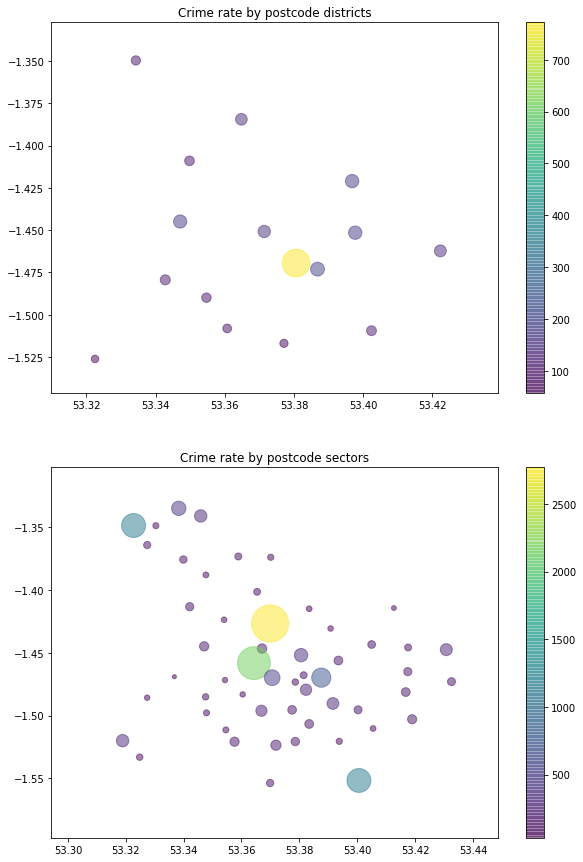

In [55]:

fig, axs = plt.subplots(2)
fig.set_size_inches(10,15)

axs[0].set_title("Crime rate by postcode districts")
p1 = axs[0].scatter(demography_D['Latitude'], demography_D['Longitude'], c=c1, cmap = 'viridis', 
                  s=demography_D['Crime rate'], alpha=0.5)
fig.colorbar(p1, ax=axs[0])

axs[1].set_title("Crime rate by postcode sectors")
p2 = axs[1].scatter(d['Latitude'], d['Longitude'], c=c2, cmap = 'viridis', 
                  s=c2*0.5, alpha=0.5)

fig.colorbar(p2, ax=axs[1])




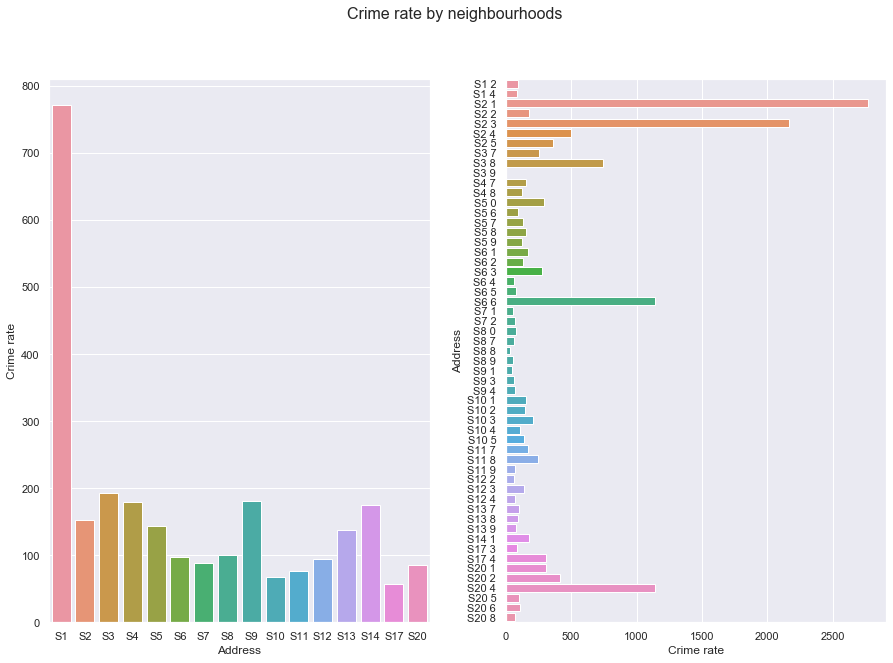

In [56]:
sns.set(font_scale=1)
fig = plt.figure() 
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

fig.suptitle('Crime rate by neighbourhoods', fontsize=16)
fig.set_size_inches(15, 10)

sns.barplot(x=demography_D.index, y= 'Crime rate', data=demography_D, ax=ax0)
sns.barplot(x='Crime rate', y=demography_S.index, data=demography_S, ax=ax1)


The crime rate is definitely the highest in city centre, around 770 crimes per 1000 residents in past 12 months. Analysis by sectors gives us different insights, with two S2 postcodes and one S6 and S20 having the highest crime rate.

<a id="item8"></a><h3>What areas are the most kids-friendly? Age distribution analysis</h3>

In [57]:
mean_age = demography_D['Schoolchild or full-time student aged 4 and over'].mean()
demography_D[demography_D['Schoolchild or full-time student aged 4 and over'] > mean_age]


,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value
Address,,,,,,,,,,,,,,,,
S6,53.4024,-1.50941,58252,53680,1161,1240,1133,1038,97,58237,41200,58252,437,5.4,39.9,39.0
S7,53.3547,-1.48991,17436,12221,483,3885,567,280,89,17453,50200,17436,323,44.7,36.2,34.0
S8,53.3428,-1.47935,46174,41360,1072,2221,1131,390,101,45911,40800,46174,442,32.6,40.2,40.0
S10,53.3771,-1.51689,47408,41142,1109,3352,974,831,68,48216,51900,47408,762,11.8,35.4,27.0
S11,53.3607,-1.50807,34383,29701,915,2241,984,542,77,34269,54700,34383,740,31.5,36.8,33.0
S17,53.3225,-1.52610,15586,14771,223,381,121,90,57,15483,51300,15586,302,10.4,45.6,48.0


We can see that postcodes S10 and S11 distinguish with number of schoolchilds. S6-8 have also above the man numbers. 

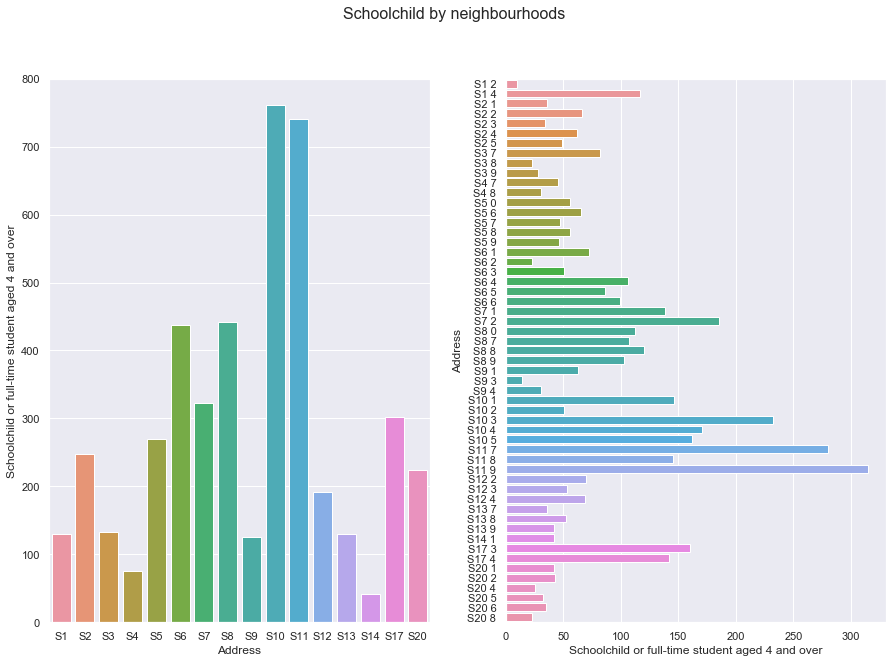

In [58]:
fig = plt.figure() 
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

fig.set_size_inches(15, 10)
fig.suptitle('Schoolchild by neighbourhoods', fontsize=16)

sns.barplot(x=demography_D.index, y = 'Schoolchild or full-time student aged 4 and over', data=demography_D, ax=ax0)
sns.barplot(x='Schoolchild or full-time student aged 4 and over', y=demography_S.index, data=demography_S, ax=ax1)


**Schoolchildren distribution maps**

In [59]:
latitude = 53.383331
longitude = -1.466667
child_sheff = folium.Map(width=600,height=500, location=[latitude, longitude], zoom_start=12)

colordict = {0: '#eb99c2', 1: '#e066a3', 2: '#d9408c', 3: '#cc0066'}

# setting quartiles 
demography_D['child_quartile'] = pd.qcut(demography_D['Schoolchild or full-time student aged 4 and over'], 4, labels=False)

for lat, lon, child_q, child, postcode in zip(demography_D['Latitude'], demography_D['Longitude'], demography_D['child_quartile'], demography_D['Schoolchild or full-time student aged 4 and over'], demography_D.index):
    label = folium.Popup(str(postcode) + ' Schoolchilds :' + str(child), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup = label,
        color='b',
        key_on = child_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[child_q],
        fill=True,
        fill_opacity=1
        ).add_to(child_sheff)
                                                    
from folium.plugins import FloatImage
image_file = 'legend1.PNG'

FloatImage(image_file, bottom=40, left=62).add_to(child_sheff)
child_sheff


In [60]:
latitude = 53.383331
longitude = -1.466667
child_sheff = folium.Map(width=600,height=500, location=[latitude, longitude], zoom_start=12)


colordict = {0: '#c299eb', 1: '#a366e0', 2: '#8c40d9', 3: '#6600cc'}

# setting quartiles 
demography_S['child_quartile'] = pd.qcut(demography_S['Schoolchild or full-time student aged 4 and over'], 4, labels=False)

for lat, lon, child_q, child, postcode in zip(demography_S['Latitude'], demography_S['Longitude'], demography_S['child_quartile'], demography_S['Schoolchild or full-time student aged 4 and over'], demography_S.index):
    label = folium.Popup(str(postcode) + ' Schoolchilds :' + str(child), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup = label,
        color='b',
        key_on = child_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[child_q],
        fill=True,
        fill_opacity=1
        ).add_to(child_sheff)
                                                         
from folium.plugins import FloatImage
image_file = 'legend2.PNG'

FloatImage(image_file, bottom=40, left=62).add_to(child_sheff)

child_sheff

<a id="item9"></a><h3>Visualizing density</h3> 

In [61]:
# create map of New York using latitude and longitude values
latitude = 53.383331
longitude = -1.466667
density_sheff = folium.Map(width=600,height=500, location=[latitude, longitude], zoom_start=12)


colordict = {0: '#7d0fd9', 1: '#9c24a6', 2: '#ba3873', 3: '#d1474d', 4:'#ff6600'}

# setting quartiles 
demography_S['density_quartile'] = pd.qcut(demography_S['Density'], 5, labels=False)

for lat, lon, density_q, density, postcode in zip(demography_S['Latitude'], demography_S['Longitude'], demography_S['density_quartile'], demography_S['Density'], demography_S.index):
    label = folium.Popup(str(postcode) + ' Density :' + str(density), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup = label,
        color='b',
        key_on = density_q,
        threshold_scale=[0,1,2,3,4],
        fill_color=colordict[density_q],
        fill=True,
        fill_opacity=1
        ).add_to(density_sheff)
   
from folium.plugins import FloatImage
image_file = 'legend3.PNG'

FloatImage(image_file, bottom=40, left=62).add_to(density_sheff)

density_sheff

<a id="item10"></a><h3>Housing prices</h3> 

In [62]:
plt.style.use('ggplot')

In [63]:
property_prices_D['Average £/sqft'] = property_prices_D['Average £/sqft'].replace(',','').astype(int)
property_prices_D['Avg asking price'] = property_prices_D['Avg asking price'].str.replace(',','').astype(int, errors='ignore')

In [64]:
property_prices_D

,Avg asking price,Avg asking price (studio),Avg asking price (1 bed),Avg asking price (2 bed),Avg asking price (3 bed),Avg asking price (4 bed),Avg asking price (5 bed),Average £/sqft,URL
Postcode,,,,,,,,,
S1,113400,"75,054","112,601","157,109",NaN,NaN,NaN,240,https://propertydata.co.uk/draw?input=S1
S2,116296,NaN,NaN,"105,541","141,844",NaN,NaN,159,https://propertydata.co.uk/draw?input=S2
S3,109284,"75,658","106,903","148,095",NaN,NaN,NaN,211,https://propertydata.co.uk/draw?input=S3
S4,102500,NaN,NaN,NaN,NaN,NaN,NaN,91,https://propertydata.co.uk/draw?input=S4
S5,123922,NaN,NaN,"97,140","131,914",NaN,NaN,124,https://propertydata.co.uk/draw?input=S5
S6,173480,NaN,"105,993","138,868","183,850","306,029",NaN,185,https://propertydata.co.uk/draw?input=S6
S7,305125,NaN,NaN,NaN,"269,000","388,731",NaN,230,https://propertydata.co.uk/draw?input=S7
S8,207183,NaN,NaN,"158,541","200,231","337,000",NaN,204,https://propertydata.co.uk/draw?input=S8
S9,115601,NaN,NaN,NaN,"119,757",NaN,NaN,125,https://propertydata.co.uk/draw?input=S9


Text(0.5, 1.0, 'Average property price for district postcodes')

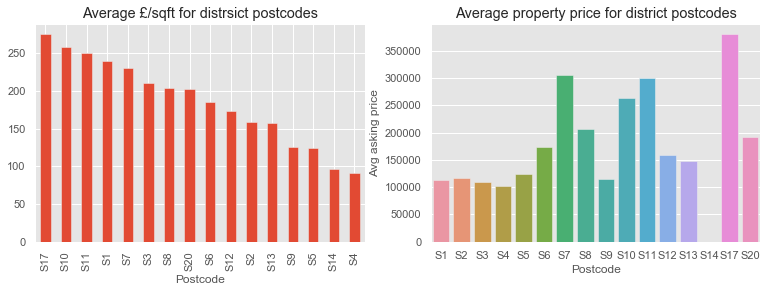

In [65]:
property_sorted = property_prices_D.sort_values(['Average £/sqft'], ascending=False, axis=0)

fig = plt.figure() 
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 
fig.set_size_inches(13, 4)

property_sorted['Average £/sqft'].plot(kind='bar', ax=ax0, title='Average £/sqft for distrsict postcodes')
sns.barplot(x=property_prices_D.index, y = 'Avg asking price', data=property_prices_D, ax=ax1)
ax1.set_title('Average property price for district postcodes')

<a id="item11"></a><h3>Parks and playgrounds</h3> 

In [66]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'SDI2VFQQ1CAIIBEUB2DNPUOTMNBQXXYFXOL4HQHMOURPA1R4' # your Foursquare ID
CLIENT_SECRET = 'P0JWQ5LU15QTVGNHYVPMT0HYJH5USVTGCADECJDS3OJPIBTH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SDI2VFQQ1CAIIBEUB2DNPUOTMNBQXXYFXOL4HQHMOURPA1R4
CLIENT_SECRET:P0JWQ5LU15QTVGNHYVPMT0HYJH5USVTGCADECJDS3OJPIBTH


In [67]:
url = 'https://api.foursquare.com/v2/venues/search?ll=40.7,-74&categoryId=4bf58dd8d48988d163941735&oauth_token=(YOUR_TOKEN)&v=20160324'

**Get list of parks, playgrounds and gardens using the FourSquare API**

In [68]:
places = []
category = '4bf58dd8d48988d163941735,4bf58dd8d48988d1e7941735,4bf58dd8d48988d15a941735,4f4533804b9074f6e4fb0105,4f4533814b9074f6e4fb0107,52e81612bcbc57f1066b7a45,4f4533814b9074f6e4fb0106'
radius = 800

# create URL
for lat, lng, postalcode in zip(coordinates_sectors['Latitude'], coordinates_sectors['Longitude'], coordinates_sectors['Address']):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    lat, 
    lng,
    VERSION, 
    category,
    radius)

# send the GET request and examine the results

    results = requests.get(url).json()["response"]["venues"]
    
    for venue in results:
        places.append((
            postalcode, 
            lat, 
            lng,
            venue['name'],
            venue['location']['lat'],
            venue['location']['lng'],
            venue['categories'][0]['name']
        ))
                

In [69]:
sites_df = pd.DataFrame(places)
sites_df.columns = ['Postcode','Latitude', 'Longitude', 'Name', 'Location Lat', 'Location Lng', 'Category']
print(sites_df.shape)
sites_df.head()

(278, 7)


,Postcode,Latitude,Longitude,Name,Location Lat,Location Lng,Category
0,S1 2,53.3815,-1.46786,Winter Gardens,53.379935,-1.468008,Garden
1,S1 2,53.3815,-1.46786,Peace Gardens,53.379860,-1.469582,Garden
2,S1 2,53.3815,-1.46786,St. John's Church Park,53.383224,-1.453930,Park
3,S1 2,53.3815,-1.46786,Children 1st,53.385123,-1.473577,Nursery School
4,S1 2,53.3815,-1.46786,Balm Green Gardens - Barkers Pool.,53.380549,-1.471392,Garden


Let's remove duplicates

In [70]:
sites_df.drop_duplicates(subset=['Postcode','Name'], inplace = True)
sites_df

,Postcode,Latitude,Longitude,Name,Location Lat,Location Lng,Category
0,S1 2,53.3815,-1.46786,Winter Gardens,53.379935,-1.468008,Garden
1,S1 2,53.3815,-1.46786,Peace Gardens,53.379860,-1.469582,Garden
2,S1 2,53.3815,-1.46786,St. John's Church Park,53.383224,-1.453930,Park
3,S1 2,53.3815,-1.46786,Children 1st,53.385123,-1.473577,Nursery School
4,S1 2,53.3815,-1.46786,Balm Green Gardens - Barkers Pool.,53.380549,-1.471392,Garden
...,...,...,...,...,...,...,...
273,S20 5,53.3274,-1.36421,Kidz Kingdom,53.331723,-1.364449,Playground
274,S20 5,53.3274,-1.36421,mosborough park,53.325691,-1.369862,Park
275,S20 6,53.3399,-1.37576,Birley Moor Garden Centre,53.339802,-1.386625,Garden
276,S20 8,53.3304,-1.34882,Runaround Playcentre,53.334390,-1.338090,Playground


In [71]:
sites_df['Category'].unique()

array(['Garden', 'Park', 'Nursery School', 'Playground',
       'Elementary School', 'Lake', 'Preschool', 'Pool', 'Middle School',
       'Tennis Court', 'Cemetery'], dtype=object)

In [72]:
options = ['Garden', 'Park', 'Playground']
parks = sites_df[sites_df['Category'].isin(options)]
parks

,Postcode,Latitude,Longitude,Name,Location Lat,Location Lng,Category
0,S1 2,53.3815,-1.46786,Winter Gardens,53.379935,-1.468008,Garden
1,S1 2,53.3815,-1.46786,Peace Gardens,53.379860,-1.469582,Garden
2,S1 2,53.3815,-1.46786,St. John's Church Park,53.383224,-1.453930,Park
4,S1 2,53.3815,-1.46786,Balm Green Gardens - Barkers Pool.,53.380549,-1.471392,Garden
5,S1 2,53.3815,-1.46786,Fountain Square,53.380521,-1.471573,Park
...,...,...,...,...,...,...,...
273,S20 5,53.3274,-1.36421,Kidz Kingdom,53.331723,-1.364449,Playground
274,S20 5,53.3274,-1.36421,mosborough park,53.325691,-1.369862,Park
275,S20 6,53.3399,-1.37576,Birley Moor Garden Centre,53.339802,-1.386625,Garden
276,S20 8,53.3304,-1.34882,Runaround Playcentre,53.334390,-1.338090,Playground


In [73]:
parks_playgrounds = pd.DataFrame({'parks count' : parks.groupby(by='Postcode').size()})
parks_playgrounds.sort_values(['parks count'], ascending=False, axis=0, inplace=True)

In [74]:
parks_playgrounds.head(10)

,parks count
Postcode,
S1 2,11
S3 7,11
S1 4,10
S10 2,10
S2 4,8
S8 9,8
S11 8,8
S7 1,7
S2 3,6


<a id="item12"></a><h3>Schools</h3> 

In [75]:
school = ['Elementary School', 'Nursery School','Middle School', 'Preschool']
schools = sites_df[sites_df['Category'].isin(school)]
schools

,Postcode,Latitude,Longitude,Name,Location Lat,Location Lng,Category
3,S1 2,53.3815,-1.46786,Children 1st,53.385123,-1.473577,Nursery School
10,S1 2,53.3815,-1.46786,Netherthorpe Primary School,53.386345,-1.481508,Elementary School
19,S1 4,53.3786,-1.47333,Children 1st,53.385123,-1.473577,Nursery School
25,S1 4,53.3786,-1.47333,Netherthorpe Primary School,53.386345,-1.481508,Elementary School
30,S2 1,53.3699,-1.42670,Pipworth Community Primary School,53.373132,-1.416463,Elementary School
...,...,...,...,...,...,...,...
262,S17 3,53.3248,-1.53315,Dore Primary School,53.324451,-1.538292,Elementary School
266,S17 4,53.3189,-1.52005,Bradway Primary School,53.318367,-1.510186,Elementary School
267,S20 1,53.3459,-1.34105,Beighton Bizzy Bee,53.344699,-1.332400,Nursery School
271,S20 2,53.3383,-1.33498,Beighton Bizzy Bee,53.344699,-1.332400,Nursery School


In [76]:
elementary_schools = pd.DataFrame({'schools count' : schools.groupby(by='Postcode').size()})
elementary_schools.sort_values(['schools count'], ascending=False, axis=0, inplace=True)

In [77]:
elementary_schools.head(10)

,schools count
Postcode,
S6 4,6
S8 8,5
S11 8,4
S7 1,4
S10 2,3
S3 8,3
S8 0,3
S2 5,3
S1 2,2


<a id="item13"></a><h3>Results / Summary</h3> 

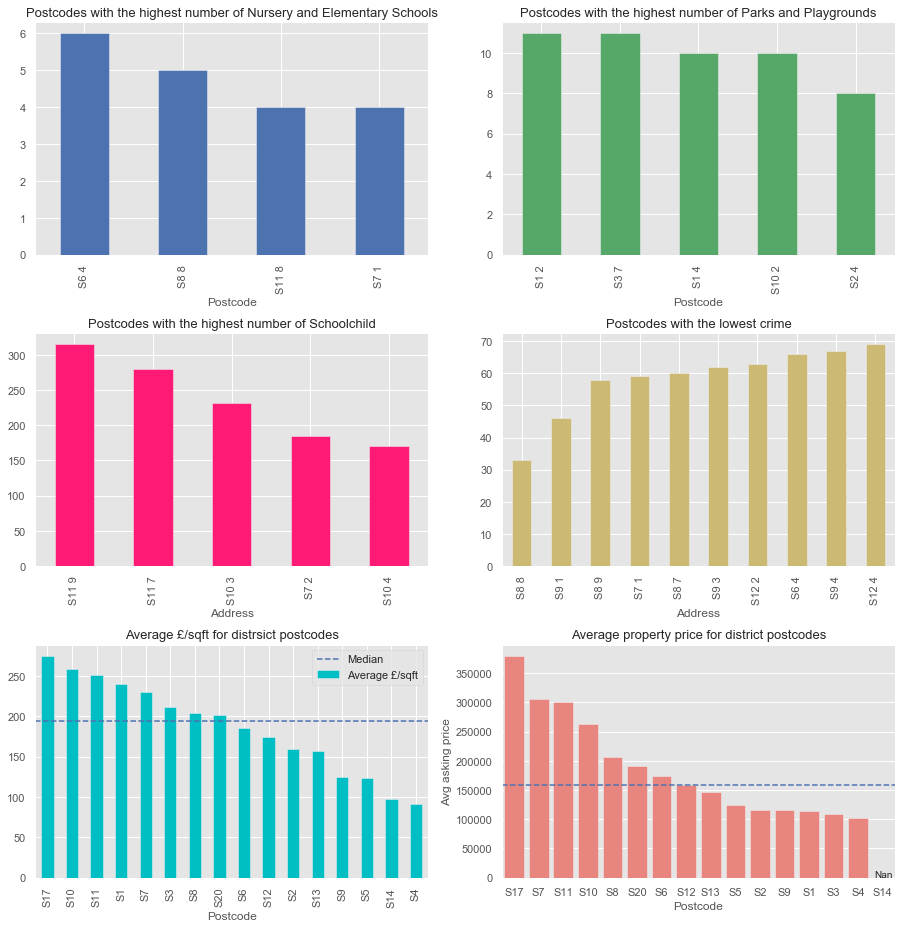

In [78]:
fig = plt.figure() 
ax0 = fig.add_subplot(3, 2, 1) 
ax1 = fig.add_subplot(3, 2, 2) 
ax2 = fig.add_subplot(3, 2, 3) 
ax3 = fig.add_subplot(3, 2, 4) 
ax4 = fig.add_subplot(3, 2, 5)
ax5 = fig.add_subplot(3, 2, 6)

fig.set_size_inches(13, 13)

elementary_schools['schools count'].head(4).plot(
    kind='bar', ax=ax0, title='Postcodes with the highest number of Nursery and Elementary Schools', color='b')
ax0.title.set_size(13)

parks_playgrounds['parks count'].head(5).plot(
    kind='bar', ax=ax1, title='Postcodes with the highest number of Parks and Playgrounds', color='g')
ax1.title.set_size(13)

schoolchilds = demography_S.sort_values(['Schoolchild or full-time student aged 4 and over'], ascending=False, axis=0)
schoolchilds['Schoolchild or full-time student aged 4 and over'].head(5).plot(
    kind='bar', ax=ax2, title='Postcodes with the highest number of Schoolchild', color='#ff1a75')
ax2.title.set_size(13)

crime = demography_S['Crime rate'].dropna()
crime.astype(int).sort_values().head(10).plot(kind='bar', ax=ax3, title='Postcodes with the lowest crime', color='y')
ax3.title.set_size(13)
median = property_prices_D['Average £/sqft'].median()

property_prices_D.sort_values(['Average £/sqft'], ascending=False, axis=0).plot(
    kind='bar', ax=ax4, title='Average £/sqft for distrsict postcodes', color='#00BFC4')
ax4.title.set_size(13)
ax4.axhline(property_prices_D['Average £/sqft'].median(), c='b', label = 'Median', ls='--')
ax4.legend(loc='best')

property_prices_D = property_prices_D.sort_values(['Avg asking price'], ascending=False, axis=0)
sns.barplot(x=property_prices_D.index, y = 'Avg asking price', data=property_prices_D, ax=ax5, color='#F8766D')
ax5.set_title('Average property price for district postcodes')
ax5.text(14.65, 5, 'Nan')
ax5.title.set_size(13)
ax5.axhline(property_prices_D['Avg asking price'].median(), c='b', label = 'Median', ls='--')

plt.tight_layout()

We're looking for an affordable neighbourhood with low crime rate, children-freindly. Let's summarize which areas have:
- highest number of schoolchilds in the area
- lowest crime rate
- the biggest number of parks and playgrounds
- affordable prices (low property prices)

Three postcodes from S8 area have low crime rate, including S8 8 having the lowest rate. We have also three postcodes from S9 area, and two from S12 having slightly higher crime rate and one from S6 (S6 4). 
Areas S10 and S11 have the highest number of schoolchildren and S6 4 is the first postcode regsrding number of schools, following with S8 8 and S11 8.
Parks and playgrounds numbers give us totaly highlight different areas - here S1 and S3 are the first ones. 

When we compare price per sqft, we can see that S8 and S20 are bit over median with S6 being slightly below. Analyzing property prices we see the same postcodes being around median, with S6, S8 and S20 above and S12 a bit below. S17, S10 and S11 are the most expensive areas however only S11 and S10 stand out with number of schoolchildren.


In the end, let's choose those rows in our dataset where Crime rate is below median, number schoolchild, schools and parks above median. 

Returned postcodes are:
S1 4, S6 5, S7 1 and S8 8. 

As was presentd above, the postcodes areas with property prices around mean are S8, S20, S6, S12.

Recommendation based on available data:

S8 (S8 8), S6 (S6 4 and S6 5), S7 (S7 1). 

In [79]:
summary_1 = pd.merge(demography_S, elementary_schools, how='left', left_on=demography_S.index, right_on='Postcode')
summary_2 = pd.merge(summary_1, parks_playgrounds, how = 'left', left_on='Postcode', right_on='Postcode').drop(columns=['child_quartile','density_quartile'])

In [80]:
summary = summary_2.fillna(0)
summary.head()

,Postcode,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value,schools count,parks count
0,S1 2,53.3815,-1.46786,1330,872,22,229,113,94,96.0,43055.0,41400.0,1330,10,34.1,24.3,22.0,2.0,11.0
1,S1 4,53.3786,-1.47333,9078,6211,210,1840,371,446,84.0,32518.0,42900.0,9078,117,94.2,23.7,21.0,2.0,10.0
2,S2 1,53.3699,-1.42670,9678,8218,402,344,492,222,2771.0,6478.0,55500.0,9678,36,30.8,35.3,33.0,2.0,3.0
3,S2 2,53.3671,-1.44666,11248,9036,419,848,743,202,179.0,8075.0,47600.0,11248,66,42.2,36.3,33.0,2.0,2.0
4,S2 3,53.3643,-1.45826,8212,6532,366,632,498,184,2165.0,546.0,50900.0,8212,34,46.5,36.9,34.0,1.0,6.0


In [81]:
summary['Crime rate'] = summary['Crime rate'].astype(int)
crime_median = summary['Crime rate'].median()
schoolchild_median = summary['Schoolchild or full-time student aged 4 and over'].median()
schools_num_median = summary['schools count'].median()
parks_num_median = summary['parks count'].median()

results = summary[(summary['Crime rate'] < crime_median) & 
               (summary['Schoolchild or full-time student aged 4 and over'] > schoolchild_median) &
              (summary['schools count'] > schools_num_median) &
              (summary['parks count'] >parks_num_median)]

results

,Postcode,Latitude,Longitude,Total,White,Mixed ethnic,Asian,Black,Other,Crime rate,Population,Avg. household income,All residents Total,Schoolchild or full-time student aged 4 and over,Density,Age: Mean Age; measures: Value,Age: Median Age; measures: Value,schools count,parks count
1,S1 4,53.3786,-1.47333,9078,6211,210,1840,371,446,84,32518.0,42900.0,9078,117,94.2,23.7,21.0,2.0,10.0
20,S6 4,53.4055,-1.51033,13282,12743,192,127,104,116,66,8662.0,42600.0,13282,106,64.1,39.6,39.0,6.0,6.0
23,S7 1,53.3604,-1.48319,9635,5829,294,2911,397,204,59,11134.0,39200.0,9635,138,78.4,34.3,31.0,4.0,7.0
27,S8 8,53.3368,-1.46908,12634,11920,224,149,241,100,33,11832.0,58700.0,12634,120,28.8,42.7,43.0,5.0,5.0


Weak sides of the project:
- foursquare api doesn't seem to have all the venues like google does
- the data is incomplete 

<a id="item14"></a><h3>Clustering neighbourhoods</h3> 

I decided to cluster postcode districts in order to include housing data.

<h4>Getting list of venues using the FourSquare API<h4>

In [82]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 800 

venues = []

# create URL
for lat, lng, postalcode in zip(coordinates_sectors['Latitude'], coordinates_sectors['Longitude'], 
                                coordinates_sectors['Address']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)

# send the GET request and examine the results

    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            postalcode, 
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
                

In [83]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f7b22fe93f49a46779a419e'},
 'response': {'headerLocation': 'Mosborough',
  'headerFullLocation': 'Mosborough, Sheffield',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 53.3376000072, 'lng': -1.3367862289113632},
   'sw': {'lat': 53.32319999279999, 'lng': -1.360853771088637}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e89d8c693ad35ed6f4cb89f',
       'name': 'Co-op Food',
       'location': {'address': '9-10 Foxlowe,',
        'lat': 53.330796096713705,
        'lng': -1.3492584228515625,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.330796096713705,
          'lng': -1.3492584228515625}],
        'distance': 52,
        'postalCode': 'S20 8ND',
   

In [84]:
venues_df = pd.DataFrame(venues)
venues_df.columns = ['Postcode','Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(1087, 7)


,Postcode,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,S1 2,53.3815,-1.46786,Marmadukes Cafe Deli,53.381121,-1.468207,Café
1,S1 2,53.3815,-1.46786,Crucible Theatre,53.381021,-1.466653,Theater
2,S1 2,53.3815,-1.46786,Edo Sushi,53.383361,-1.467071,Sushi Restaurant
3,S1 2,53.3815,-1.46786,Lyceum Theatre,53.380722,-1.467183,Theater
4,S1 2,53.3815,-1.46786,Peace Gardens,53.379860,-1.469582,Garden


Let's check how many venues were returned for each postcode

In [85]:
venues_df.groupby('Postcode').count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Postcode,,,,,,
S1 2,100,100,100,100,100,100
S1 4,100,100,100,100,100,100
S10 1,40,40,40,40,40,40
S10 2,44,44,44,44,44,44
S10 3,12,12,12,12,12,12
S10 4,4,4,4,4,4,4
S10 5,7,7,7,7,7,7
S11 7,4,4,4,4,4,4
S11 8,50,50,50,50,50,50


In [86]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 169 uniques categories.


<a id="item15"></a><h3>Analyze venues for each postalcode</h3>

We need to convert venues columns into one-hot representation, as we cannot process string values directly.

In [87]:
# one hot encoding
sheffield_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add postcode back to dataframe
sheffield_onehot['Postcode'] = venues_df['Postcode'] 

# move postcode to the first column
fixed_columns = list(sheffield_onehot.columns[-1:]) + list(sheffield_onehot.columns[:-1])
sheff_onehot = sheffield_onehot[fixed_columns]

print(sheff_onehot.shape)
sheff_onehot.head()


(1087, 170)


,Postcode,American Restaurant,Amphitheater,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,...,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,S1 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S1 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S1 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S1 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S1 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's group rows by postal code and by taking the mean of the frequency of occurrence of each category

In [88]:
sheffield_grouped = sheff_onehot.groupby(['Postcode']).mean().reset_index()
sheffield_grouped

,Postcode,American Restaurant,Amphitheater,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,...,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,S1 2,0.010000,0.000000,0.01,0.00000,0.010000,0.000000,0.000000,0.01,0.010000,...,0.0,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
1,S1 4,0.010000,0.000000,0.01,0.00000,0.010000,0.000000,0.000000,0.01,0.010000,...,0.0,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
2,S10 1,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000,0.000000
3,S10 2,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.022727,0.000000,0.000000,0.022727,0.000000,0.022727,0.000,0.000000
4,S10 3,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
5,S10 4,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
6,S10 5,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
7,S11 7,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
8,S11 8,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
9,S11 9,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


In [89]:
sheffield_grouped.shape

(55, 170)

Get 10 most occurance venue types in each area

In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Postcode']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
postalcode_venues_sorted = pd.DataFrame(columns=columns)
postalcode_venues_sorted['Postcode'] = sheffield_grouped['Postcode']

for ind in np.arange(sheffield_grouped.shape[0]):
    row_categories = sheffield_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    postalcode_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

postalcode_venues_sorted.sort_values(freqColumns, inplace=True)
postalcode_venues_sorted

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,S8 7,Bar,Café,Chinese Restaurant,Sandwich Place,English Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
14,S13 8,Bar,Carpet Store,Grocery Store,Pharmacy,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
13,S13 7,Bus Stop,Bar,Grocery Store,Business Service,Chinese Restaurant,Pub,Diner,Falafel Restaurant,Deli / Bodega,Food & Drink Shop
35,S5 0,Bus Stop,Business Service,Sports Club,Music Venue,Caribbean Restaurant,Gourmet Shop,Bakery,Food & Drink Shop,Falafel Restaurant,Food
22,S2 4,Chinese Restaurant,Grocery Store,Pub,Fast Food Restaurant,Café,Mexican Restaurant,Hotel,Sandwich Place,Coffee Shop,Gym / Fitness Center
52,S9 1,Clothing Store,Coffee Shop,American Restaurant,Sandwich Place,Platform,Pizza Place,Convenience Store,Hotel,Pharmacy,Shoe Store
15,S13 9,Construction & Landscaping,Home Service,Pizza Place,Business Service,Furniture / Home Store,Pub,Recreation Center,Department Store,Event Space,Fish & Chips Shop
19,S2 1,Construction & Landscaping,Supermarket,Fast Food Restaurant,Grocery Store,Park,Electronics Store,Fish & Chips Shop,Farm,Falafel Restaurant,Event Space
18,S17 4,Cricket Ground,Indian Restaurant,Grocery Store,Park,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
54,S9 4,Food & Drink Shop,Warehouse Store,Supermarket,Athletics & Sports,Train Station,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm


<a id="item16"></a><h3>Cluster Neighborhoods</h3>

In [91]:
# set number of clusters
kclusters = 5

sheffield_grouped_clustering = sheffield_grouped.drop(['Postcode'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sheffield_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 0, 0, 2, 2, 1, 0, 4, 4,
       3, 3, 0, 3, 0, 3, 4, 4, 3, 3, 3, 0, 0, 0, 1, 1, 1, 0, 3, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each postalcode.

In [92]:
sheffield_clustered = coordinates_sectors
sheffield_clustered['Cluster'] = kmeans.labels_

sheffield_clustered = sheffield_clustered.join(postalcode_venues_sorted.set_index('Postcode'), on='Address')
sheffield_clustered.sort_values(['Cluster'] + freqColumns, inplace=True)
sheffield_clustered

,Address,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,S8 7,53.3274,-1.48579,0,Bar,Café,Chinese Restaurant,Sandwich Place,English Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
45,S13 9,53.3701,-1.37397,0,Construction & Landscaping,Home Service,Pizza Place,Business Service,Furniture / Home Store,Pub,Recreation Center,Department Store,Event Space,Fish & Chips Shop
48,S17 4,53.3189,-1.52005,0,Cricket Ground,Indian Restaurant,Grocery Store,Park,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
14,S5 7,53.4175,-1.46503,0,Grocery Store,Fish & Chips Shop,Park,Sandwich Place,Women's Store,Donut Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
15,S5 8,53.4168,-1.48131,0,Grocery Store,Fish & Chips Shop,Sandwich Place,Women's Store,Donut Shop,Food,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
39,S11 9,53.3546,-1.51147,0,Pub,Café,Massage Studio,Coffee Shop,Bakery,English Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farm
35,S10 4,53.3699,-1.55375,0,Pub,Construction & Landscaping,Indian Restaurant,Park,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
33,S10 2,53.3775,-1.49548,0,Pub,Grocery Store,Bar,Coffee Shop,Sandwich Place,Falafel Restaurant,Scenic Lookout,Burrito Place,Shipping Store,Design Studio
47,S17 3,53.3248,-1.53315,0,Pub,Grocery Store,Women's Store,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
52,S20 5,53.3274,-1.36421,0,Pub,Hotel,Seafood Restaurant,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space


<h4>Visualizing the clusters</h4> 

In [93]:
# create map
latitude = 53.383331
longitude = -1.466667
map_clusters = folium.Map(width=700,height=500, location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, cluster in zip(sheffield_clustered['Latitude'], sheffield_clustered['Longitude'], sheffield_clustered['Address'], sheffield_clustered['Cluster']):
    label = folium.Popup('{} - Cluster {}'.format(post, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)     
        
map_clusters

<a id="item17"></a><h3>Examine clusters</h3>

We have grouped neighbourhoods into 5 clusters, however upon observing the result of the k-means clustering clear differences between clusters are not spotted. The same conclusion was drawn from clustering into 4 and 6 clusters.

In [94]:
sheffield_clustered.loc[sheffield_clustered['Cluster'] == 0, sheffield_clustered.columns[[0] + list(range(3, sheffield_clustered.shape[1]))]]

,Address,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,S8 7,0,Bar,Café,Chinese Restaurant,Sandwich Place,English Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
45,S13 9,0,Construction & Landscaping,Home Service,Pizza Place,Business Service,Furniture / Home Store,Pub,Recreation Center,Department Store,Event Space,Fish & Chips Shop
48,S17 4,0,Cricket Ground,Indian Restaurant,Grocery Store,Park,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
14,S5 7,0,Grocery Store,Fish & Chips Shop,Park,Sandwich Place,Women's Store,Donut Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
15,S5 8,0,Grocery Store,Fish & Chips Shop,Sandwich Place,Women's Store,Donut Shop,Food,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
39,S11 9,0,Pub,Café,Massage Studio,Coffee Shop,Bakery,English Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farm
35,S10 4,0,Pub,Construction & Landscaping,Indian Restaurant,Park,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
33,S10 2,0,Pub,Grocery Store,Bar,Coffee Shop,Sandwich Place,Falafel Restaurant,Scenic Lookout,Burrito Place,Shipping Store,Design Studio
47,S17 3,0,Pub,Grocery Store,Women's Store,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
52,S20 5,0,Pub,Hotel,Seafood Restaurant,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space


In [95]:
sheffield_clustered.loc[sheffield_clustered['Cluster'] == 1, sheffield_clustered.columns[[0] + list(range(3, sheffield_clustered.shape[1]))]]

,Address,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,S10 5,1,Pub,Convenience Store,Grocery Store,Soccer Stadium,Gastropub,Bus Stop,Department Store,English Restaurant,Cricket Ground,Fish & Chips Shop
37,S11 7,1,Pub,Food,Massage Studio,Bakery,Women's Store,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
38,S11 8,1,Pub,Grocery Store,Fast Food Restaurant,Café,Bakery,Coffee Shop,Sandwich Place,Thai Restaurant,Italian Restaurant,Pizza Place
18,S6 2,1,Pub,Tram Station,Coffee Shop,Discount Store,Fast Food Restaurant,Racetrack,Tea Room,Pharmacy,Hardware Store,Casino


In [96]:
sheffield_clustered.loc[sheffield_clustered['Cluster'] == 2, sheffield_clustered.columns[[0] + list(range(3, sheffield_clustered.shape[1]))]]

,Address,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,S4 8,2,Grocery Store,Hookah Bar,Wine Shop,Moving Target,Playground,Bus Stop,Climbing Gym,English Restaurant,Food,Fish & Chips Shop
16,S5 9,2,Home Service,Concert Hall,Other Repair Shop,Grocery Store,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
17,S6 1,2,Supermarket,Pub,Auto Dealership,Tram Station,Discount Store,Lighting Store,Bakery,Sporting Goods Shop,Salon / Barbershop,Coffee Shop


In [97]:
sheffield_clustered.loc[sheffield_clustered['Cluster'] == 3, sheffield_clustered.columns[[0] + list(range(3, sheffield_clustered.shape[1]))]]

,Address,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,S13 8,3,Bar,Carpet Store,Grocery Store,Pharmacy,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant
43,S13 7,3,Bus Stop,Bar,Grocery Store,Business Service,Chinese Restaurant,Pub,Diner,Falafel Restaurant,Deli / Bodega,Food & Drink Shop
5,S2 4,3,Chinese Restaurant,Grocery Store,Pub,Fast Food Restaurant,Café,Mexican Restaurant,Hotel,Sandwich Place,Coffee Shop,Gym / Fitness Center
2,S2 1,3,Construction & Landscaping,Supermarket,Fast Food Restaurant,Grocery Store,Park,Electronics Store,Fish & Chips Shop,Farm,Falafel Restaurant,Event Space
31,S9 4,3,Food & Drink Shop,Warehouse Store,Supermarket,Athletics & Sports,Train Station,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant,Farm
41,S12 3,3,Grocery Store,Pub,Tram Station,Women's Store,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
25,S8 0,3,Gym / Fitness Center,Supermarket,Pub,Hardware Store,Sandwich Place,Indian Restaurant,Pizza Place,Fast Food Restaurant,Gastropub,Climbing Gym
49,S20 1,3,Indian Restaurant,Department Store,Gym,Supermarket,Bar,Sandwich Place,Women's Store,English Restaurant,Food,Fish & Chips Shop
46,S14 1,3,Light Rail Station,Grocery Store,Tram Station,Scenic Lookout,Women's Store,Fish & Chips Shop,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
13,S5 6,3,Pet Store,Construction & Landscaping,Gym,Grocery Store,Park,Women's Store,Fast Food Restaurant,Farm,Falafel Restaurant,Event Space
